#**CHAPTER 7 신경망 & 딥러닝**

딥러닝은 머신러닝의 한 방법이며, 신경망 모델이라고 불리는 뇌의 신경 네트워크에서 힌트를 얻은 알고리즘입니다. 그 중에서도 특히 층을 많이 활용한 모델이 '딥러닝'입니다.

딥러닝은 심층 신경망이라고도 합니다. 심층은 '깊은 층으로 이루어진'을 의미하고, 신경망은 뇌의 신경 회로를 모방한 계산 모델을 말합니다. 즉, 딥러닝은 '깊은 층으로 이루어진 신경망 모델'이란는 뜻입니다.

##**7.1 뉴런 모델**

신경망 모델은 '뉴런 모델' 단위로 구축됩니다. 뉴런 모델은 뇌의 신경 세포에서 힌트를 얻어 만들어진 수학적 모델입니다. 신경 세포가 영어로 뉴런이기 때문에 뉴런 모델이라고 합니다.

###**신경 세포**
신경 세포는 축삭이라는 케이블을 가지고 있으며, 이 축삭을 사용하여 전기적 펄스를 다른 신경 세포에 전달합니다. 축삭은 시냅스라고 불리는 인터페이스를 통해 펄스를 다음 신경 세포에 전달합니다. 

신경 세포는 다른 세포에서 전기적 펄스를 받으면 세포의 전기적인 레벨이 오르락 내리락 합니다. 시냅스에는 몇 가지 종류가 있으며, 이를 통해 막 전위를 올리는 방향으로 작동하는지, 내리는 방향을 작동하는지가 정해져 있습니다. 그 정도는 입력을 받는 시냅스의 상태에 따라 달라집니다.

그리고 막 전위가 일정한 값을 초과하면 그 신경 세포는 전기적인 펄스를 발신하고, 펄스는 축삭을 타고 다음 세포로 전달됩니다. 우리의 학습은 다양한 신경 세포 간의 시냅스 전달 강도가 변화하여 일어난다고 생각할 수 있습니다.


###**뉴런 모델**
이러한 신경 세포의 움직임을 단순화한 수학적 모델인 뉴런 모델을 설명합니다. 뉴런에 2개의 입력 $x = (x_0,x_1)$가 들어오는 것을 가정합니다.

입력 값은 양수와 음수 값을 갖을 수 있는 실수로 헙니다. 각각의 입력에 대한 시냅스 전달 강도를 $w_0,w_1$로 하여, 이들을 곱하여 모든 입력으로 합을 얻은 상수w2를 더한 것을 입력 총합(막 전위) a로 합니다.

$$ a = w_0x_0 + w_1x_1 + w_2$$

w2는 절편을 나타내는 매개 변수입니다. 항상 1을 갖는 3번째 입력 x2가 있다고 가정하여

$$ a = w_0x_0 + w_1x_1 + w_2x_2$$
로 식을 만듭니다. 그러면 시그마로 깔끕하게 정리가 됩니다.
$$ a = \sum_{i=0}^2w_ix_i$$

x2를 더미 입력이라고 하니다. 입력 총합 a에서 시그모이드 함수에 적용시킨 것을 뉴런의 출력값 y로 합니다.

$$y = \frac{1}{1+exp(-a)}$$

y는 0부터 1까지 연속된 값을 갖습니다. 신경 세포의 출력은 펄스를 보내거나 보내지 않는 두가지 값밖에 없다고 볼 수 있지만, 여기에서는 출력 값은 단위 시간당 펄스 수, 즉 '발화 빈도'를 나타내고 있다고 생각합니다. a가 클수록 발화 빈도는 한계값인 1에 가까워지고, 반대로 a가 음의 값을 취할수록 발화 빈도는 0에 가까워지며 거의 발화하지 않은 상태가 됩니다.

즉, 이 뉴런 모델은 2차원의 입력 공간(x0,x1)을 직선으로 나누어 한쪽에 0에서 0.5의 값을, 다른 한쪽에는 0.5에서 1사이의 숫자를 할당하는 기능을 갖습니다.

뉴런 모델은 D차원의 입력 공간을 D-1차원 평면에서 2개로 나눈다고 말할 수 있습니다.

그럼 N개의 데이터셋$(x_n,t_n)$에 대한 뉴런 모델의 학습 방법을 확인합시다. 먼저 목적함수는 평균 교차 엔트로피 오차입니다.

$$E(w) = -\frac{1}{N}\sum_{n=0}^{N-1}\{t_nln y_n + (1 - t_n)ln(1-y_n)\}$$

이 오차 함수의 매개 변수에 대한 기울기는 다음과 같습니다.

$$\frac{\partial E}{\partial w_i} = \frac{1}{N}\sum_{n=0}^{N-1}(y_n-t_n)x_{ni}$$

매개 변수의 학습 법칙은 그 기울기를 사용하여 다음과 같이 됩니다.

$$w_i(t+1) = w_i(t) - a\frac{\partial E}{\partial w_i}$$

##**7.2 신경망 모델**

###**2층 피드 포워드 신경망**

뉴런 모델은 입력 공간을 선으로 나눈다는 단순한 기능밖에 없지만, 이를 많이 조합하여 강력한 힘을 발휘할 수 있습니다. 이러한 뉴런의 집합체 모델을 신경망이라고 합니다. 신경망 모델은 다양한 구조와 기능이 있지만 여기서는 한 방향으로만 흐르는 '피드 포워드 신경망'을 고려합니다.

#(그림첨부)

위의 그림은 2층의 포워드 신경망입니다. 이 신경망은 2차원의 입력을 3개의 뉴런으로 출력하기 때문에 2차원에서 주어진 수치를 3개의 카테고리로 분류할 수 있습니다. 각각의 출력 뉴런의 출력 값이 각각의 카테고리에 속하는 확률을 나타내도록 학습시킵니다.

네트워크를 수식으로 자세히 살펴보면 입력은 x0,x1의 2차원입니다. 거기에 항상 1을 갖는 더미의 x2가 더해져 중간층 두 뉴런에 정보가 전달됩니다. i번째 입력부터 j번째 뉴런에 대한 가중치를 $w_{ji}$와 같이 쓰기로하고, j번째 뉴런의 입력 총합을 $b_j$로 합니다.

$$b_j = \sum_{i=0}^2w_{ji}x_i$$

위 식의 입력 총합을 시그모이드 함수에 적용하여 중간층 뉴런의 출력 $z_j$를 얻습니다

$$z_j = h(b_j)$$

h()는 입력 총합에서 출력을 결정하는 함수라는 의미에서 활성화 함수라고 합니다. 중간층의 출력으로 출력층의 뉴런의 활동이 정해집니다. 중간층 j번째 뉴런부터 출력층 k번째 뉴런의 가중치를 $v_{kj}$로 나타냅니다. 출력층 번호 k번째의 뉴런의 입력 총합 $a_k$는 다음과 같습니다.

$$a_k = \sum_{j=0}^2v_{kj}z_j$$

출력층의 출력 $y_k$는 소프트맥스 함수를 사용합니다.

$$y_k = \frac{exp(a_k)}{\sum_{l=0}^2exp(a_l)} = \frac{exp(a_k)}{u}$$

소프트맥스 함수를 사용했기 때문에 출력 $y_k$의 합 y0+y1+y2이 1이 되어, 확률적 해석이 가능해집니다. 이상으로 네트워크의 동작을 정의했습니다.

보다 일반적으로 입력 차원을 D, 중간층 뉴런의 수를 M, 출력 차원을 K로 한 경우, 네트워크는

* 중간층의 입력 총합

$$b_j = \sum_{i=0}^Dw_{ji}x_i$$

* 중간층의 출력

$$z_j = h(b_j)$$

* 출력층의 입력 총합

$$a_k = \sum_{j=0}^Mv_{kj}z_j$$

* 출력층의 출력

$$y_k = \frac{exp(a_k)}{\sum_{l=0}^{K-1}exp(a_l)} = \frac{exp(a_k)}{u}$$

으로 정의됩니다.

###**2층 피드 포워드 신경망의 구현**

그러면 파이썬으로 구현하여 동작을 확인해 봅시다. 먼저 사용할 데이터를 만듭니다.

In [ ]:

import numpy as np
# 데이터 생성 --------------------------------
np.random.seed(seed=1) # 난수를 고정
N = 200 # 데이터의 수
K = 3 # 분포의 수
T = np.zeros((N, 3), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0의 범위, 표시용
X_range1 = [-3, 3] # X1의 범위, 표시용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # 각 분포에 대한 비율
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk < Pi[k]:
            T[n, k] = 1
            break
    for k in range(2):
        X[n, k] = np.random.randn() * Sig[T[n, :] == 1, k] + \
        Mu[T[n, :] == 1, k]

오버 피팅이 일어나고 있지 않는지 확인하기 위해서 이 데이터를 훈련 데이터 X_train, T_train과 테스트 데이터 X_test,T_test로 나누어 둡니다.

In [ ]:

# -------- 2 분류 데이터를 테스트 훈련 데이터로 분할
TestRatio = 0.5
X_n_training = int(N * TestRatio)
X_train = X[:X_n_training, :]
X_test = X[X_n_training:, :]
T_train = T[:X_n_training, :]
T_test = T[X_n_training:, :]


# -------- 데이터를 'class_data.npz'에 저장
np.savez('class_data.npz', X_train=X_train, T_train=T_train,
         X_test=X_test, T_test=T_test,
         X_range0=X_range0, X_range1=X_range1)

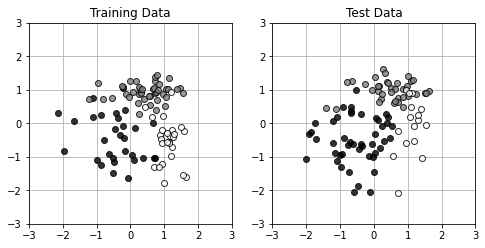

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline


# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none',
                 marker='o', markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)


# 메인 ------------------------------------
plt.figure(1, figsize=(8, 3.7))
plt.subplot(1, 2, 1)
Show_data(X_train, T_train)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Training Data')
plt.subplot(1, 2, 2)
Show_data(X_test, T_test)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.title('Test Data')
plt.show()

데이터를 준비했으므로 네트워크를 만들어봅시다. 그리고 이 네트워크에서 3클래스 분류 문제가 풀리는지 확인해 봅시다.

2층의 피드 포워드 신경망을 정의하는 함수를 FNN으로 합니다.
FNN은 네트워크의 입력 x를 받아 y를 출력합니다. 입력 x는 D차원 벡터이며, 출력 y는 K차원 벡터입니다. 여기서는 D=2,K=3으로 진행했습니다.



네트워크 함수는 N개의 데이터를 한꺼번에 처리할 수 있도록 설계합니다. 벡터 y의 요소 y[n,0], y[n,1], y[n,2]는 x[n,:]이 클래스 0,1,2에 속해 있을 가능성을 나타냅니다. 모두 더하면 1이 됩니다. 또한 중간층의 수와 출력의 차원도 자유롭게 바꿀 수 있도록 각각을 M,K로 하여, 네트워크의 인수로 합니다.

네트워크의 동작을 결정하는 중요한 매개 변수인 중간층 가중치 W와 출력층의 가중치 V도 네트워크에 전달합니다. W는 Mx(D+1)의 행렬이며, V는 K x(M+1)의 행렬입니다. 

W와 V의 정보는 W와 V를 한 덩어리로 한 벡터 wv로 전달합니다. wv의 길이는 M x (D+1) + K x (M+1) 입니다. 학습하는 매개변수를 한 곳에 모아두면 나중에 최적화 프로그램을 만들기 쉽습니다.

FNN의 출력은 N개의 데이터에 대응한 출력 y (N x K 행렬)와 중간층의 출력 z,출력층과 중간층의 입력 총합 a,b도 출력합니다. 이 정보는 wv를 학습시킬 때 사용합니다.



In [ ]:
# 네트워크 프로그램 코드
# 시그모이드 함수 ------------------------
def Sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y


# 네트워크 ------------------------
def FNN(wv, M, K, x):
    N, D = x.shape # 입력 차원
    w = wv[:M * (D + 1)] # 중간층 뉴런의 가중치
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):] # 출력층 뉴런의 가중치
    v = v.reshape((K, M + 1))
    b = np.zeros((N, M + 1)) # 중간층 뉴런의 입력 총합
    z = np.zeros((N, M + 1)) # 중간층 뉴런의 출력
    a = np.zeros((N, K)) # 출력층 뉴런의 입력 총합
    y = np.zeros((N, K)) # 출력층 뉴런의 출력
    for n in range(N):
        # 중간층의 계산
        for m in range(M):
            b[n, m] = np.dot(w[m, :], np.r_[x[n, :], 1]) # (A)
            z[n, m] = Sigmoid(b[n, m])
        # 출력층의 계산
        z[n, M] = 1 # 더미 뉴런
        wkz = 0
        for k in range(K):
            a[n, k] = np.dot(v[k, :], z[n, :])
            wkz = wkz + np.exp(a[n, k])
        for k in range(K):
            y[n, k] = np.exp(a[n, k]) / wkz
    return y, a, z, b


# test ---
WV = np.ones(15)
M = 2
K = 3
FNN(WV, M, K, X_train[:2, :])

(array([[0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333]]),
 array([[2.6971835 , 2.6971835 , 2.6971835 ],
        [1.49172649, 1.49172649, 1.49172649]]),
 array([[0.84859175, 0.84859175, 1.        ],
        [0.24586324, 0.24586324, 1.        ]]),
 array([[ 1.72359839,  1.72359839,  0.        ],
        [-1.12079826, -1.12079826,  0.        ]]))

M = 2, K = 3으로 하여, WV는 길이가 2x3 + 3x3 = 15인 가중치 벡터입니다.

 WV의 요소 모두를 1로 하여, 입력으로 X_train의 두 데이터만 입력했을 때의 출력이 표시됩니다. 위에서부터 y,a,z,b의 값입니다. 

###**수치 미분법**
 우선 분류 문제이므로 오차 함수는 평균 교차 엔트로피 오차를 사용합니다.

$$E(w,v) =-\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}log(y_{nk})$$

이 평균 오차 엔트로피 오차를 CE_FNN함수로 구현합니다.



In [ ]:

# 평균 교차 엔트로피 오차 ---------
def CE_FNN(wv, M, K, x, t):
    N, D = x.shape
    y, a, z, b = FNN(wv, M, K, x)
    ce = -np.dot(np.log(y.reshape(-1)), t.reshape(-1)) / N
    return ce


# test ---
WV = np.ones(15)
M = 2
K = 3
CE_FNN(WV, M, K, X_train[:2, :], T_train[:2, :])

1.0986122886681098

CE_FNN은 FNN과 마찬가지로 매개 변수 w와 v를 붙인 wv를 입력합니다. 또한 네트워크의 크기를 결정하는 M과 K, 그리고 입력 데이터 x와 목표 데이터 t를 입력합니다. 내부에서 FNN이 x에 대한 y를 출력하고, y와 t를 비교하여 교차 엔트로피가 계산됩니다.

경사하강법을 적용하려면 오차 함수를 매개 변수로 편미분한 식이 필요하지만, 사실은 이 미분 계산을 성실하게 하지 않고도, 계산 속도에 신경쓰지 않는다면 간단히 수치적 미분과 마찬가지의 값을 구할 수 있습니다.

오차 함수 E(w)를 상정하여 w는 $w^*$라는 값을 갖고 있다고 할때, 경사 하강법은 $w^*$ 지점에서 E(w)의 w에 관한 편미분 $\partial E/\partial w$를 계산하고, 거기에 마이너스를 곱한 방향으로 $w^*$를 갱신합니다.

그러나 성실하게 미분에서 기울기를 게산하지 않아도 $w^*$의 조금 앞의 지점 $w^*-\epsilon$에서의 $E(w^*-\epsilon)$와, $w^*-$에서 조금 앞선 $w^*+\epsilon$ 지점에서 $E(w^*+\epsilon)$의 값을 구하면 $w^*$ 지점에서의 기울기를 근사할 수 있습니다.

$$\frac{\partial E}{\partial w}|_{w^*} =\frac{E(w^*+\epsilon) - E(w^*-\epsilon)}{2\epsilon}$$

그런데 실제로 매개 변수는 하나가 아니라 여러 개입니다. 예를 들어 매개 변수가 w0,w1,w2의 3개라고 했을 때, 현재의 $w_0^*, w_1^*, w_2^*$라는 점에서 E(w0,w1,w2)의 기울기를 알려면,먼저 $w_0^*, w_1^*$는 고정하여 $w_0^*$의 전후로 $\epsilon$만큼 비켜 놓은 두 점의 기울기에서 w0에 대한 편미분을 근사합니다.

w1,w2에 관해서도 마찬가지로 그 외의 매개 변수를 고정하여 편미분을 구합니다. 

이는 직감적으로 매개 변수 공간의 현재 있는 지점에서 그 근방 오차 함수의 크기를 찾아보고, 오차 함수가 어느 방향으로 기울어져 있는지를 확인하는 방법입니다.

이 방법은 어디까지나 근사이지만 $\epsilon$를 충분히 작게 취하면 근사치는 실제 값에 충분히 가까워집니다. 다만 이 방법의 단점은 정밀도의 오차보다는 계산 비용에 있습니다. 한 매개 변수의 미분을 계산하기 위해 매개 변수 하나에 두 번의 E의 계산이 필요하기 때문입니다.



[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


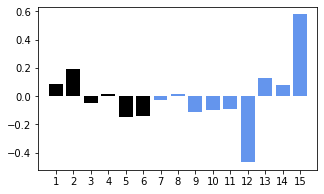

In [ ]:

# - 수치 미분 ------------------
def dCE_FNN_num(wv, M, K, x, t):
    epsilon = 0.001
    dwv = np.zeros_like(wv)
    for iwv in range(len(wv)):
        wv_modified = wv.copy()
        wv_modified[iwv] = wv[iwv] - epsilon
        mse1 = CE_FNN(wv_modified, M, K, x, t)
        wv_modified[iwv] = wv[iwv] + epsilon
        mse2 = CE_FNN(wv_modified, M, K, x, t)
        dwv[iwv] = (mse2 - mse1) / (2 * epsilon)
    return dwv


#--dVW의 표시 ------------------
def Show_WV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3], align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)


#-test----
M = 2
K = 3
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)
dWV = dCE_FNN_num(WV, M, K, X_train[:2, :], T_train[:2, :])
print(dWV)
plt.figure(1, figsize=(5, 3))
Show_WV(dWV, M)
plt.show()

위의 그래프는 15개의 가중치 매개 변수 각각에 대한 수치 미분 값입니다.

###**수치 미분법에 의한 경사 하강법**

In [ ]:

import time


# 수치 미분을 사용한 구배법 -------
def Fit_FNN_num(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wvt = wv_init
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n): # (A)
        wvt = wvt - alpha * dCE_FNN_num(wvt, M, K, x_train, t_train)
        err_train[i] = CE_FNN(wvt, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wvt, M, K, x_test, t_test)
        wv_hist[i, :] = wvt
    return wvt, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000 # (B) 학습 단계
alpha = 0.5
WV, WV_hist, Err_train, Err_test = Fit_FNN_num(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:187.840 sec


만들어 놓은 함수들을 이용해서 분류 문제를 경사 하강법으로 풀은 코드입니다.

지금까지와는 다른 부분은 입력에 학습시키는 가중치의 초기값으로 wv_init을 넣은 것입니다. 또 훈련 데이터 뿐만 아니라 테스트 데이터도 입력합니다. 이것은 학습 단계별로 테스트 데이터의 오차도 체크해 오버 피팅이 일어나고 있지 않은지 확인하기 위해서입니다.

도입부 import time에서 로드한 time 라이브러리는 계산 시간을 측정하기 위해 사용합니다. for 루프 내에서 wvt를 dCE_FNN_num으로 갱신하여, 매번 훈련 데이터의 오차와 테스트 데이터의 오차를 계산하고 있습니다. 

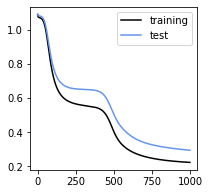

In [ ]:

# 학습 오차의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label ='test')
plt.legend()
plt.show()

훈련 데이터의 오차가 단조롭게 감소하여 일정한 값으로 수렴하고 있음을 확인할 수 있습니다. 재미있는 것은 400단계 부근에서 학습이 수렴한 것처럼 보이지만, 또 급격히 학습이 진행되고 있습니다.

이를 알아보기 위해서 가중치의 시간 변화도를 플롯해봅니다.

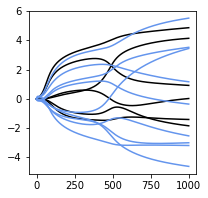

In [ ]:

# 가중치의 시간 변화의 표시 ---------------------------
plt.figure(1, figsize=(3, 3))
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
plt.show()

중간층의 가중치 w를 검정으로, 출력층의 가중치 v를 파란색 선으로 표시했습니다. 0 주변의 기본값으로 시작된 가중치는 각각 특정 값으로 서서히 수렴하고 있습니다. 그러나 자세히 400단계 부근에서 각각의 가중치 그래프가 교차하고 있음을 알 수 있습니다. 이것은 가중치를 갱신하는 방향, 즉 오차 함수의 기울기 방향이 변화하는 것을 의미합니다. 

가중치가 안장점이라는 지점 근처를 통과했을 가능성이 있습니다.

![안장점](https://upload.wikimedia.org/wikipedia/commons/4/40/Saddle_point.png)

안장점은 어느 방향은 계곡, 다른 방향으로는 산이 되는 지점입니다. 경사 하강법에 따라 가중치는 계곡의 중심을 향애 나아가고 있지만, 중심에 가까워질수록 기울기는 작아지고. 갱신도 느려집니다. 그러나 어느 정도 진행되면 거기에서 점차 방향이 변화하고, 또한 갱신이 가속됩니다.

신경망에 의해 만들어지는 오차 함수의 지형은 복잡합니다. 비선형성이 강한 신경망의 경우는 일단 학습이 수렴해도 멈추지 않고 더 노력하면 학습이 단숨에 진행되는 경우가 많습니다. 그래서 신경망의 학습 단계수를 결정하는 것은 상당히 어려운 문제입니다.

과연 오차 가중치만으로 네트워크가 학습이 잘 되었나를 확인하기 위해서 데이터 공간을 클래스 0,1,2로 판정하는 영역의 경계선을 표시합니다.



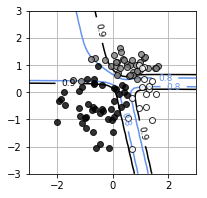

In [ ]:

# 경계선 표시 함수 --------------------------
def show_FNN(wv, M, K):
    xn = 60 # 등고선 표시 해상도
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
    y, a, z, b = FNN(wv, M, K, x)
    plt.figure(1, figsize=(4, 4))
    for ic in range(K):
        f = y[:, ic]
        f = f.reshape(xn, xn)
        f = f.T
        cont = plt.contour(xx0, xx1, f, levels=[0.8, 0.9],
                           colors=['cornflowerblue', 'black'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
    
    
# 경계선 표시 --------------------------
plt.figure(1, figsize=(3, 3))
Show_data(X_test, T_test)
show_FNN(WV, M, K)
plt.show()

학습에 사용하지 않은 테스트 데이터 상에서도 경계선을 잘 그리는 것을 확인할 수 있습니다. 

하지만 수치 미분은 실행 속도가 느립니다. 그래서 편미분을 해석적으로 구하여 실행 속도를 빠르게 합니다.

###**오차 역전파법**

피드 포워드 신경망에 학습시키는 방법으로 오차 역전파법이 유명합니다, 이 오차 역전파법은 네트워크의 출력에서 발생하는 오차의 정보를 사용하여, 출력층의 가중치 $v_{kj}$에서 중간층에 가중치 $w_{ji}$으로 입력 방향의 반대로 가중치를 갱신해 나가기 때문에 이러한 이름이 붙었습니다.
사실 오차 역전파법은 경사 하강법입니다. 경사 하강법을 피드 포워드 네트워크에 적용하면 오차 역전파법이 자연스럽게 도출됩니다.

경사 하강법을 적용하기 위해 오차 함수를 매개 변수로 편미분합니다. 오차 함수는 평균 교차 엔트로피 오차로 사용합시다. 
$$E(w,v) =-\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}t_{nk}log(y_{nk})$$

우선 하나의 데이터 n에만 해당하는 상호 엔트로피 오차 $E_n$을 다음과 같이 정의합니다.

$$E(w,v) =-\sum_{k=0}^{K-1}t_{k}ln(y_{k})$$

그리고 처음 식을 약간 바꿔줍니다.

$$E(w,v) = \frac{1}{N}\sum_{k=0}^{K-1}E_n(w,v)$$

즉, 평균 상호 엔트로피 오차는 데이터 각각의 상호 엔트로피 오차의 평균으로 해석됩니다. 경사 하강법에서 사용하는 E의 매개 변수의 편미분은, 예를 들어 $\partial E/\partial w_{ji}$를 고려했을 때 합과 미분은 교활할 수 있기 때문에 각 데이터 n에 대한 $\partial E_n/\partial w_{ji}$을 구하여 평균을 하면 본래 목적인 $\partial E/\partial w_{ji}$을 구할 수 있습니다.

그러므로 $\partial E_n/\partial w_{ji}$의 도출을 목표로 합니다.

###**$\partial E_n/\partial v_{ji}$을 구하기**

첫째, 편미분의 연쇄율을 사용하여 $\partial E/\partial w_{ji}$를 두 미분의 곱으로 분해합니다.

$$\frac{\partial E}{\partial v_{kl}} = \frac{\partial E}{\partial a_{k}}\frac{\partial a_k}{\partial v_{kl}}$$

여기서 E는 $E_n$입니다, 먼저 처음 부분의 $\frac{\partial E}{\partial a_{k}}$를 k =0의 경우에서 찾아봅니다. 다음과 같은 식으로 구할 수 있습니다.

$$\frac{\partial E}{\partial a_{0}} = \frac{\partial}{\partial a_{0}}(-t_0logy_0 - t_1logy_1 - t_2logy_2)$$

여기서 $t_k$는 지도 신호이기 떄문에 입력 총합의 a0으로 변화하는 것은 아니지만 네트워크 출력인 $y_k$는 물론 입력 총합 a0와 관계하고 있습니다 그래서 $t_k$는 상수, $y_k$는 a0의 함수로 확장을 하면 다음의 식을 얻을 수 있습니다.

$$\frac{\partial E}{\partial a_{0}} = -t_0\frac{1}{y_0}\frac{\partial y_0}{\partial a_0}-t1\frac{1}{y_1}\frac{\partial y_1}{\partial a_1}-t2\frac{1}{y_2}\frac{\partial y_2}{\partial a_2}$$

이 변형에는 로그 함수의 미분 공식을 사용합니다. 여기서 위 식의 1항의 $\frac{\partial y_0}{\partial a_0}$부분은 y가 a의 소프트맥스 함수로 만들어져 있기 떄문에 다음과 같이 됩니다.

$$\frac{\partial y_0}{\partial a_0} = y_0(1-y_0)$$

같은 방식으로 2항,3항의 미분도 구하면 다음과 같습니다.

$$\frac{\partial y_1}{\partial a_0} = -y_0y_1$$
$$\frac{\partial y_2}{\partial a_0} = -y_0y_2$$

따라서 식은 다음과 같이 전개됩니다. 

$$\frac{\partial E}{\partial a_{0}} = -t_0\frac{1}{y_0}\frac{\partial y_0}{\partial a_0}-t1\frac{1}{y_1}\frac{\partial y_1}{\partial a_1}-t2\frac{1}{y_2}\frac{\partial y_2}{\partial a_2}$$

$$=-t_0(1-y_0)+t_1y_0+t_2y_0$$
$$=(t_0+t_1+t_2)y_0 - t_0$$
$$=y_0 - t_0$$

마지막은 t0 + t1 + t2 = 1을 사용했습니다. y0은 첫 뉴런의 출력으로, t0은 그에 대한 지도 신호이므로 y0 - t0은 오차를 나타내고 있습니다. 마찬가지로 k=1,2의 경우도 구할 수 있습니다.

따라서 식을 정리하면 다음과 같습니다.

$$\frac{\partial E}{\partial a_k} = y_k - t_k$$

이는 출력층(2층)의 오차를 나타내므로 밑의 식처럼 나타냅니다.

$$\frac{\partial E}{\partial a_k} = \delta_k^{(2)}$$

이번에는 $\frac{\partial a_k}{\partial v_{kj}}$를 구합니다. 우선 k=0인 경우를 생각하면 a0는 다음과 같습니다.

$$a_0 = v_{00}z_{0} + v_{01}z_{1} + v_{02}z_{2}$$

그래서 다음과 같이 됩니다. 

$$\frac{\partial a_0}{\partial v_{00}} = z_0, \frac{\partial a_0}{\partial v_{01}} = z_1, \frac{\partial a_0}{\partial v_{02}} = z_2$$

정리해서 쓰면 

$$\frac{\partial a_0}{\partial v_{0j}} = z_j$$

식이 얻어집니다.

이제 이렇게 얻어진 식을 맨 처음의 체인룰에 적용합니다.

$$\frac{\partial E}{\partial v_{kl}} = \frac{\partial E}{\partial a_{k}}\frac{\partial a_k}{\partial v_{kl}} = (y_k-t_k)z_j = \delta_k^{(2)}z_j$$

따라서 $v_{kj}$의 갱신 규칙은 다음과 같습니다.

$$v_{kj}(t+1) = v_{kj}(t) - a\frac{\partial E}{\partial v_{kl}} = v_{kj}(t) - a\delta_k^{(2)}z_j$$

위 식의 의미를 생각해보면 가중치 $v_{kj}$는 중간층의 뉴런 j에서 출력층의 뉴런 k에 정보를 전달하는 결합의 가중치입니다. 이 결합의 변경의 크기는 입력 크기 $z_j$와 그 앞에 생기는 오차 $\delta_k^{(2)}z_j$의 곱으로 결정된다는 것입니다.

출력 $y_k$가 목표 데이터 $t_k$와 일치하는 경우 오차는 0이 되므로 결과적으로 $v_{kj}$는 변하지 않습니다. 이는 오차가 없으면 결합은 변경할 필요가 없음을 의미합니다.

###**$\partial E_n/\partial w_{ji}$를 구하기**

다음으로 입력층에서 1층의 가중치 매개 변수 $w_{ji}$의 학습 법칙을 도출합시다. 이것도 오차 함수 E를 $w_{ji}$로 편미분할 뿐입니다. 아까 했던것과 마찬가지로 편미분의 연쇄 법칙을 사용하여 $\partial E/\partial w_{ji}$를 분해합니다.

$$\frac{\partial E}{\partial w_{ji}} = \frac{\partial E}{\partial b_{j}}\frac{\partial b}{\partial w_{ji}}$$

처음의 중간층 뉴런의 입력 총합 $b_j$에서 편미분 $\frac{\partial E}{\partial b_{j}}$를 출력층의 입력 총합의 미분 $\frac{\partial E}{\partial a_{k}} = \delta_k^{(2)}$와의 유사성으로부터 도출한 식을 정의합니다.

$\frac{\partial E}{\partial b_{j}} = \delta_j^{(1)}$

두번째로 $\frac{\partial b_j}{\partial w_{ji}}$는 다음과 같습니다.

$$\frac{\partial b_j}{\partial w_{ji}} = \frac{\partial }{\partial w_{ji}}\sum_{i=0}^Dw_{ji}x_i = x_i$$

따라서 $w_{ji}$의 갱신 규칙은 밑의 식이 됩니다.

$$w_{ji}(t+1) = w_{ji}(t) - a\frac{\partial E}{\partial w_{ji}} = w_{ji}(t) - a\delta_j^{(1)}x_i$$

이는 앞에서 구했던 $v_{kj}$의 갱신 규칙과 같은 모양을 하고 있습니다. 즉 $w_{ji}$도 결합 전에 발생한 오차와 결합 본래의 입력에 비례하는 형태로 변경된 것으로 나타납니다.

아직 $\delta_j^{(1)}x_i$가 무엇인지를 알아보지 않았습니다. 이것도 편미분 연쇄 규칙을 사용하여 전개합니다.

$$\delta_k^{(1)}x_i = \frac{\partial E}{\partial b_{j}} = \{\sum_{k=0}^{K-1}\frac{\partial E}{\partial a_{k}}\frac{\partial a_k}{\partial z_{j}}\}\frac{\partial z_j}{\partial b_{j}}$$

분해한 첫 번째 $\frac{\partial E}{\partial a_{k}}$는 정의에 의해 $\delta_k^{(2)}$로 나타낼 수 있습니다. 두 번째 $ \frac{\partial a_k}{\partial z_{j}}$는 다음과 같습니다.

$$\frac{\partial a_k}{\partial z_{j}} = \frac{\partial}{\partial z_{j}}\sum_{j=0}^{M}v_{kj}z_j = v_{kj}$$

3번째 $\frac{\partial z_j}{\partial b_{j}}$는 중간층의 활성화 함수 h()로 하면 다음과 같이 표시됩니다.

$$\frac{\partial z_j}{\partial b_{j}} =\frac{\partial}{\partial b_{j}}h(b_j) = h`(b_j)$$

이 식들을 다 정리하면 다음과 같이 됩니다.

$$\delta_k^{(1)} = h`(b_j)\sum_{k=0}^{K-1}v_k\delta_k^{(2)}$$ 

식을 자세히 살펴보면, 처음의 $h`(b_j)$는 활성화 함수의 미분이며 항상 양수입니다. 다음의 합에는 대상의 오차인 $\delta_k^{(2)}$을 $v_{kj}$의 가중치로 모으는 형태가 되어 있습니다. 즉, $\delta_k^{(1)}$는 결합한 곳에서 생긴 오차 $\delta_k^{(2)}$를 반대 방향으로 전달시켜 계산한다고 볼 수 있습니다. 

여기까지의 계산은 2층의 네트워크를 다뤘지만, 오차 역전파법은 네트워크 계층이 더 늘어도 이 법칙을 사용하여 간단하게 가중치 매개 변수의 학습 법칙을 도출할 수 있습니다. 이 특성으로 피드 포워드 신경망의 경사 하강법이 오차 역전파법이라고 불립니다.

네트워크 매개 변수의 갱신 방법을 순서로 나타내면 다음과 같습니다.

* (1) 네트워크에 x를 입력하고 출력 y를 얻습니다, 이때 중간에 계산된 b,z,a도 보유해둡니다.

* (2) 출력 y를 목표 데이터 t와 비교해 그 차이를 계산합니다. 이 오차는 출력층의 각 뉴런에 할당된다고 생각합니다.

* (3) 출력층의 오차를 사용하여 중간층의 오차를 계산합니다

* (4) 결합 본래의 신호 강도와 결합처의 오차 정보를 사용하여 가중치 매개 변수를 갱신합니다

이 일련의 절차는 데이터 하나에 대한 갱신입니다. 사실 N개의 데이터가 있으니 데이터를 하나씩 바꾸면서 (1)~(4)의 절차를 N번 처리해 학습의 1단계로 합니다.

그런데, 도출한 학습 법칙은 2층의 피드 포워드 네트워크에 국한된 것이었지만, 3층 4층 등의 네트워크에서도 똑같은 형태가 됩니다. 층이 많은 경우 (2)와 (3)의 단계를 사용하여 출력 쪽에 가까운 층에서 입려 쪽을 향해 차례대로 각 뉴런의 오차를 계산합니다. 그리고 (4)의 단계에 따라 각각의 가중치를 결합 이전 뉴런의 활성과 결합 후 뉴런의 오차 정보를 사용해 변경해 나가면 됩니다.

###**오차 역전파법의 구현**

이제 경사 하강법, 즉 오차 역전파법으로 각 가중치의 편미분 값을 구하는 프로그램을 만듭니다.

함수의 이름은 dCE_FNN으로 합니다. $\partial E/\partial w 및 \partial E/\partial v$은 프로그램에서 각각 dw,dv로 하고 있으며, 함수의 출력은 이들을 결합한 dwv로 합니다.

동작 확인을 위해 임의로 생성한 가중치 매개 변수 WV에 대한 해석적 미분값 dWV_ana를 출력하고, 이전에 작성한 수치 미분값 dWV_num도 표시합니다.

analytical dWV
[ 0.08848131  0.19158    -0.051398    0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115649 -0.10104422 -0.09427964 -0.46855604
  0.13096434  0.08076649  0.57971253]
numerical dWV
[ 0.0884813   0.19157999 -0.05139799  0.01281536 -0.14468029 -0.14242768
 -0.02992012  0.01351315 -0.11115648 -0.10104422 -0.09427964 -0.46855603
  0.13096434  0.08076649  0.57971252]


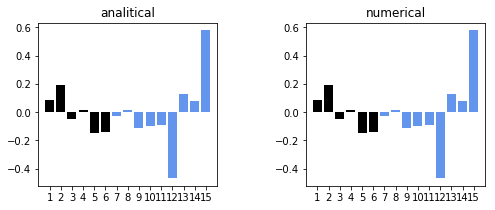

In [ ]:

# -- 해석적 미분 -----------------------------------
def dCE_FNN(wv, M, K, x, t):
    N, D = x.shape
    # wv을 w와 v로 되돌림
    w = wv[:M * (D + 1)]
    w = w.reshape(M, (D + 1))
    v = wv[M * (D + 1):]
    v = v.reshape((K, M + 1))
    # ① x를 입력하여 y를 얻음
    y, a, z, b = FNN(wv, M, K, x)
    # 출력 변수의 준비
    dwv = np.zeros_like(wv)
    dw = np.zeros((M, D + 1))
    dv = np.zeros((K, M + 1))
    delta1 = np.zeros(M) # 1층 오차
    delta2 = np.zeros(K) # 2층 오차(k = 0 부분은 사용하지 않음)
    for n in range(N): # (A)
        # ② 출력층의 오차를 구하기
        for k in range(K):
            delta2[k] = (y[n, k] - t[n, k])
        # ③ 중간층의 오차를 구하기
        for j in range(M):
            delta1[j] = z[n, j] * (1 - z[n, j]) * np.dot(v[:, j], delta2)
        # ④ v의 기울기 dv를 구하기
        for k in range(K):
            dv[k, :] = dv[k, :] + delta2[k] * z[n, :] / N
        # ④ w의 기울기 dw를 구하기
        for j in range(M):
            dw[j, :] = dw[j, :] + delta1[j] * np.r_[x[n, :], 1] / N
    # dw와 dv를 합체시킨 dwv로 만들기
    dwv = np.c_[dw.reshape((1, M * (D + 1))), \
                dv.reshape((1, K * (M + 1)))]
    dwv = dwv.reshape(-1)
    return dwv


#------Show VW
def Show_dWV(wv, M):
    N = wv.shape[0]
    plt.bar(range(1, M * 3 + 1), wv[:M * 3],
            align="center", color='black')
    plt.bar(range(M * 3 + 1, N + 1), wv[M * 3:],
            align="center", color='cornflowerblue')
    plt.xticks(range(1, N + 1))
    plt.xlim(0, N + 1)
    
    
#-- 동작 확인
M = 2
K = 3
N = 2
nWV = M * 3 + K * (M + 1)
np.random.seed(1)
WV = np.random.normal(0, 1, nWV)


dWV_ana = dCE_FNN(WV, M, K, X_train[:N, :], T_train[:N, :])
print("analytical dWV")
print(dWV_ana)


dWV_num = dCE_FNN_num(WV, M, K, X_train[:N, :], T_train[:N, :])
print("numerical dWV")
print(dWV_num)


plt.figure(1, figsize=(8, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
Show_dWV(dWV_ana, M)
plt.title('analitical')
plt.subplot(1, 2, 2)
Show_dWV(dWV_num, M)
plt.title('numerical')
plt.show()

해석적 미분값은 이전에 계산한 수치 미분값과 거의 일치합니다. 그래프로 나타내도 거의 동일합니다. 분석 미분이 제대로 계산된다는 것을 알 수 있습니다.

이젠 수치 미분으로 풀어본 분류 문제를 오차 역전파법으로 풀어봅시다. Fit_FNN은 수치 미분의 경우 Fit_FNN_num과 거의 동일하며, 수치 미분 dCE_FNN_num을 사용하고 있던 부분을 방금 작성한 dCE_FNN으로 바꿔줍니다. 

In [ ]:

import time


# 해석적 미분을 사용한 구배법 -------
def Fit_FNN(wv_init, M, K, x_train, t_train, x_test, t_test, n, alpha):
    wv = wv_init.copy()
    err_train = np.zeros(n)
    err_test = np.zeros(n)
    wv_hist = np.zeros((n, len(wv_init)))
    epsilon = 0.001
    for i in range(n):
        wv = wv - alpha * dCE_FNN(wv, M, K, x_train, t_train) # (A)
        err_train[i] = CE_FNN(wv, M, K, x_train, t_train)
        err_test[i] = CE_FNN(wv, M, K, x_test, t_test)
        wv_hist[i, :] = wv
    return wv, wv_hist, err_train, err_test


# 메인 ---------------------------
startTime = time.time()
M = 2
K = 3
np.random.seed(1)
WV_init = np.random.normal(0, 0.01, M * 3 + K * (M + 1))
N_step = 1000
alpha = 1
WV, WV_hist, Err_train, Err_test = Fit_FNN(
    WV_init, M, K, X_train, T_train, X_test, T_test, N_step, alpha)
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

Calculation time:17.983 sec


수치 미분에 비해 계산은 훨씬 빨리 끝났습니다.

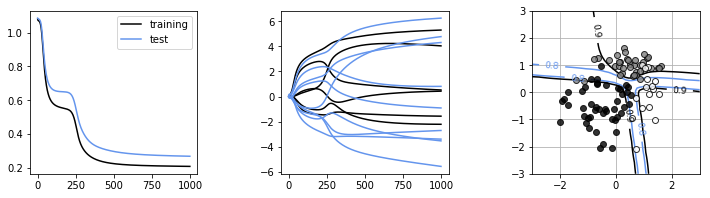

In [ ]:

plt.figure(1, figsize=(12, 3))
plt.subplots_adjust(wspace=0.5)
# 학습 오차의 표시 ---------------------------
plt.subplot(1, 3, 1)
plt.plot(Err_train, 'black', label='training')
plt.plot(Err_test, 'cornflowerblue', label='test')
plt.legend()
# 가중치의 시간 변화 표시 ---------------------------
plt.subplot(1, 3, 2)
plt.plot(WV_hist[:, :M * 3], 'black')
plt.plot(WV_hist[:, M * 3:], 'cornflowerblue')
# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
M = 2
K = 3
show_FNN(WV, M, K)
plt.show()

그리고 수치 미분 때와 거의 같은 결과를 얻었습니다.

네트워크의 규모가 커질수록 미분 계산 속도의 중요성은 커집니다. 하지만 수치 미분이 의미가 없는것은 아닙니다. 수치 미분은 도출된 미분 방정식이 맞는지 확인하는 강력한 도구가 됩니다.

###**학습 후 뉴런의 특성**



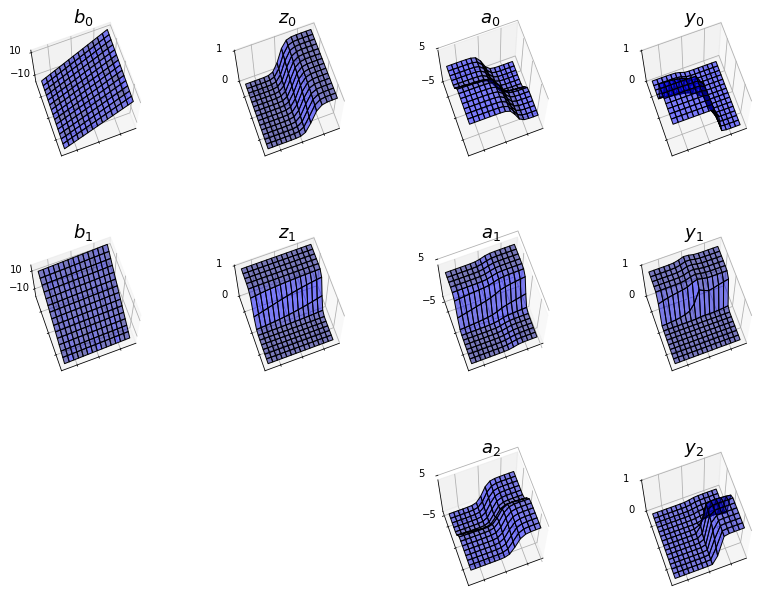

In [ ]:

from mpl_toolkits.mplot3d import Axes3D


def show_activation3d(ax, v, v_ticks, title_str):
    f = v.copy()
    f = f.reshape(xn, xn)
    f = f.T
    ax.plot_surface(xx0, xx1, f, color='blue', edgecolor='black',
                    rstride=1, cstride=1, alpha=0.5)
    ax.view_init(70, -110)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticks(v_ticks)
    ax.set_title(title_str, fontsize=18)
    
    
M = 2
K = 3
xn = 15 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
y, a, z, b = FNN(WV, M, K, x)


fig = plt.figure(1, figsize=(12, 9))
plt.subplots_adjust(left=0.075, bottom=0.05, right=0.95,
                    top=0.95, wspace=0.4, hspace=0.4)

for m in range(M):
    ax = fig.add_subplot(3, 4, 1 + m * 4, projection='3d')
    show_activation3d(ax, b[:, m], [-10, 10], '$b_{0:d}$'.format(m))
    ax = fig.add_subplot(3, 4, 2 + m * 4, projection='3d')
    show_activation3d(ax, z[:, m], [0, 1], '$z_{0:d}$'.format(m))
    
    
for k in range(K):
    ax = fig.add_subplot(3, 4, 3 + k * 4, projection='3d')
    show_activation3d(ax, a[:, k], [-5, 5], '$a_{0:d}$'.format(k))
    ax = fig.add_subplot(3, 4, 4 + k * 4, projection='3d')
    show_activation3d(ax, y[:, k], [0, 1], '$y_{0:d}$'.format(k))


plt.show()

각 그래프는 다양한 x0,x1의 쌍이 입력된 경우 각 변수의 값을 나타냅니다. 중간층 입력 총합 $b_j$는 입력 $x_i$의 선형 합이므로 입출력 맵은 평면입니다. W에 의하여 면의 기울기가 결정됩니다.

입력 총합 $b_j$의 입출력 맵은 시그모이드 함수를 빠져나가면 낮은 부분과 높은 부분이 각각 0과 1의 범위에 넣어진 출력 z가 됩니다.

출력층의 입력 총합 a의 입출력 맵은 z0,z1의 두 입출력 맵의 선형 합으로 이루어집니다. a는 소프트맥스 함수를 지나 0~1의 범위로 눌려 뭉게져 y가 만들어집니다.

출력층은 중간층 뉴런을 함수로 선형 소프트맥스 모델로 간주될 수 있습니다.

##**7.3 케라스로 신경망 모델 구현**

지금까지 신경망 프로그램을 스스로 만들어봤지만 현재 신경망의 다양한 라이브러리가 출시되어 있어, 이를 사용하면 대규모 신경망이 비교적 짫은 코드로 구현되며 빠르게 동작합니다. 

한가지 예로 구글에서 개발한 텐서플로가 유명합니다. 그리고 2015년에 출시된 케라스 라이브러를 사용하면 텐서플로를 쉽게 동작시킬 수 있습니다.

###**2층 피드 포워드 신경망**

케라스에서 지금까지처럼 3분류 문제를 푸는 2층 피드 포워드 네트워크를 만들어 봅시다.

데이터를 로드한 후 모델을 작성해서 학습시키고 평가합니다.


In [ ]:
#메모리 초기화
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) 
import keras.optimizers 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation


# 데이터 로드 ---------------------------
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:

# 데이터를 그리기 ------------------------------
def Show_data(x, t):
    wk, n = t.shape
    c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
    for i in range(n):
        plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1],
                 linestyle='none', marker='o',
                 markeredgecolor='black',
                 color=c[i], alpha=0.8)
    plt.grid(True)

In [ ]:

# 난수 초기화
np.random.seed(1)


# --- Sequential 모델 작성
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform')) # (A)
model.add(Dense(3,activation='softmax',
                kernel_initializer='uniform')) # (B)
sgd = keras.optimizers.SGD(lr=1, momentum=0.0,
                           decay=0.0, nesterov=False) # (C)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy']) # (D)


# ---------- 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs=1000, batch_size=100,
                    verbose=0, validation_data=(X_test, T_test)) # (E)


# ---------- 모델 평가
score = model.evaluate(X_test, T_test, verbose=0) # (F)
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'\
      .format(score[0], score[1]))
calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.26, accuracy 0.90
Calculation time:2.396 sec


###**케라스 사용의 흐름**

(1) 먼저 케라스에서 필요한 라이브러리를 import합니다.


In [ ]:
import keras.optimizers 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation

(2) 그리고 Sequential이라는 유형의 네트워크 모델로 model을 만듭니다. 이 model은 변수가 아닌 클래스에서 생성된 객체입니다. 객체는 여러 변수와 함수를 묶은 것으로 생각하면 됩니다. 케라스는 이 model에 층을 추가해 네트워크의 구조를 정의힙니다.

먼저 이 model에 중간층으로 Dense라는 전결합형 층을 추가합니다. Dense()의 첫번째 2는 뉴런의 수입니다. input_dim = 2는 입력의 차원이 2임을 의미합니다. activation = sigmoid는 활성화 함수로 시그모이드 함수를 사용하라는 지시입니다. Kernel_initializer = uniform은 가중치 매개 변수의 초기값을 균일 난수에서 결정한다는 의미입니다. 바이어스는 기본적으로 설정되어 있습니다. 

마찬가지로 출력층도 Dense()로 정의합니다.
출력층에서는 softmax 활성함수를 사용했고 마찬가지로 가중치 매개 변수는 균일 난수로 합니다. 이것으로 네트워크 구조의 정의는 끝입니다.

In [ ]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='sigmoid',
                kernel_initializer='uniform'))
model.add(Dense(3,activation='softmax',
                kernel_initializer='uniform'))

(3) 다음은 학습 방법의 설정을 keras.optimizers.SGD()에 실시해, 그 내용을 sgd에 넣습니다. lr은 학습 속도입니다. 이sgd를 model.compile()에 전달하여 학습 방법의 설정이 이루어집니다.

In [ ]:
sgd = keras.optimizers.SGD(lr=1, momentum=0.0,
                           decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='categorical_crossentropy',
              metrics=['accuracy'])

(4) model.fit의 인수로 x_train,t_train은 훈련 데이터를 지정하고, batch=100은 1단계 분의 기울기를 계산하는데 사용하는 학습 데이터의 수 , epochs=1000은 전체 데이터를 학습에 사용한 횟수, verbose = 0은 학습 진행 상황을 표시하지 않음, validation_data = (x_test,t_test)는 평가용 데이터의 지정이 됩니다. 출력의 history는 학습 과정의 정보가 들어 있습니다. 

(5) 마지막의 model.evalutae()에서 최종 학습의 평가 값을 출력합니다. score[0]은 테스트 데이터의 상호 엔트로피 오차, score[1]은 테스트 데이터의 정답률입니다.

결과를 그래프로 표시합니다.

학습 과정의 훈련 데이터의 교차 엔트로피 오차의 시계열 정보는 history.history['loss']에서 참조할 수 있고 훈련 데이터의 교차 엔트로피 오차는 history.history['val_loss']에서 볼 수 있습니다. 

마찬가지로 훈련 데이터의 정답률은 history.history['acc']에서 볼 수 있으며 테스트 데이터의 정답률은 history.history['val_acc']에서 볼 수 있습니다.

학습이 완료된 모델에 의한 임의의 입력 x에 대한 예측은 model.predict(x)에서 얻을 수 있습니다. 

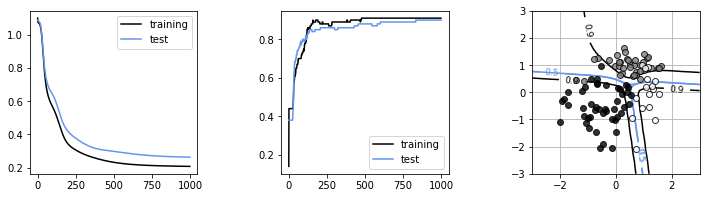

In [ ]:

plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace=0.5)


# 학습 곡선 표시 --------------------------
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label='training') # (A)
plt.plot(history.history['val_loss'], 'cornflowerblue', label='test') # (B)
plt.legend()


# 정확도 표시 --------------------------
plt.subplot(1, 3, 2)
plt.plot(history.history['acc'], 'black', label='training') # (C)
plt.plot(history.history['val_acc'], 'cornflowerblue', label='test') # (D)
plt.legend()


# 경계선 표시 --------------------------
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)]
y = model.predict(x) # (E)
K = 3
for ic in range(K):
    f = y[:, ic]
    f = f.reshape(xn, xn)
    f = f.T
    cont = plt.contour(xx0, xx1, f, levels=[0.5, 0.9], colors=[
        'cornflowerblue', 'black'])
    cont.clabel(fmt='%1.1f', fontsize=9)
    plt.xlim(X_range0)
    plt.ylim(X_range1)
plt.show()

결과에서 훈련 데이터의 오차가 빠르게 감소하는 것을 알 수 있습니다. 또한 테스트 데이터의 오차도 증가하고 있지 않기 때문에 오버 피팅은 일어나지 않았다고 말할 수 있습니다.